In [1]:
#pip install yfinance
#pip install yahoo_fin

In [2]:
import yfinance as yf

# Define the stock symbol (e.g., Apple - AAPL)
ticker = "AAPL"

# Set the date range
start_date = "2020-01-01"
end_date = "2025-02-12"

# Download historical stock data
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [3]:
column_headers = [x[0] for x in data.columns]
data.columns=column_headers
# data.reset_index(drop=False, inplace=True)
print(data.head(5))

                Close       High        Low       Open     Volume
Date                                                             
2020-01-02  72.716072  72.776598  71.466812  71.721019  135480400
2020-01-03  72.009140  72.771768  71.783985  71.941351  146322800
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403648  73.706279  71.943759  71.943759  132079200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1285 entries, 2020-01-02 to 2025-02-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1285 non-null   float64
 1   High    1285 non-null   float64
 2   Low     1285 non-null   float64
 3   Open    1285 non-null   float64
 4   Volume  1285 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 60.2 KB


In [5]:
data.describe()

,Close,High,Low,Open,Volume
count,1285.000000,1285.000000,1285.000000,1285.000000,1.285000e+03
mean,153.882630,155.439833,152.153719,153.733360,8.984934e+07
std,43.236511,43.422477,42.981392,43.196697,5.299696e+07
min,54.449898,55.452163,51.595993,55.350239,2.323470e+07
25%,127.850899,128.681140,125.723478,127.328489,5.483500e+07
50%,151.855789,153.408867,149.736988,151.776943,7.570180e+07
75%,178.879929,180.229064,176.843865,178.786588,1.066867e+08
max,258.735504,259.814335,257.347047,257.906429,4.265100e+08


<Axes: xlabel='Date'>

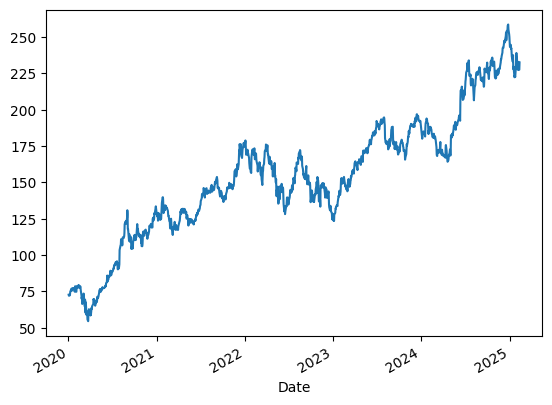

In [6]:
data['Close'].plot()

In [7]:
data.iloc[0]

Close     7.271607e+01
High      7.277660e+01
Low       7.146681e+01
Open      7.172102e+01
Volume    1.354804e+08
Name: 2020-01-02 00:00:00, dtype: float64

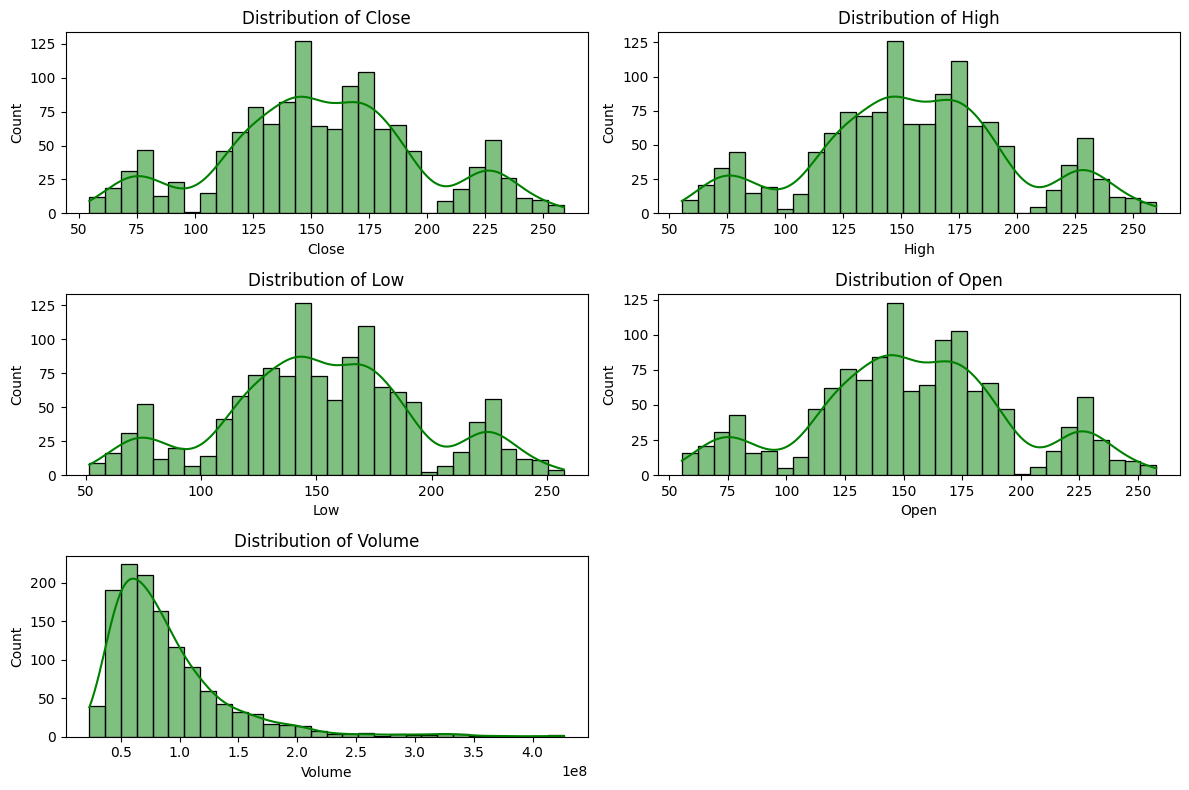

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 2, i)  # Create subplots (3 rows, 2 columns)
    sns.histplot(data[col], kde=True, bins=30, color="green")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [9]:
data = data.drop(columns=['High', 'Low'])
data.describe()

,Close,Open,Volume
count,1285.000000,1285.000000,1.285000e+03
mean,153.882630,153.733360,8.984934e+07
std,43.236511,43.196697,5.299696e+07
min,54.449898,55.350239,2.323470e+07
25%,127.850899,127.328489,5.483500e+07
50%,151.855789,151.776943,7.570180e+07
75%,178.879929,178.786588,1.066867e+08
max,258.735504,257.906429,4.265100e+08


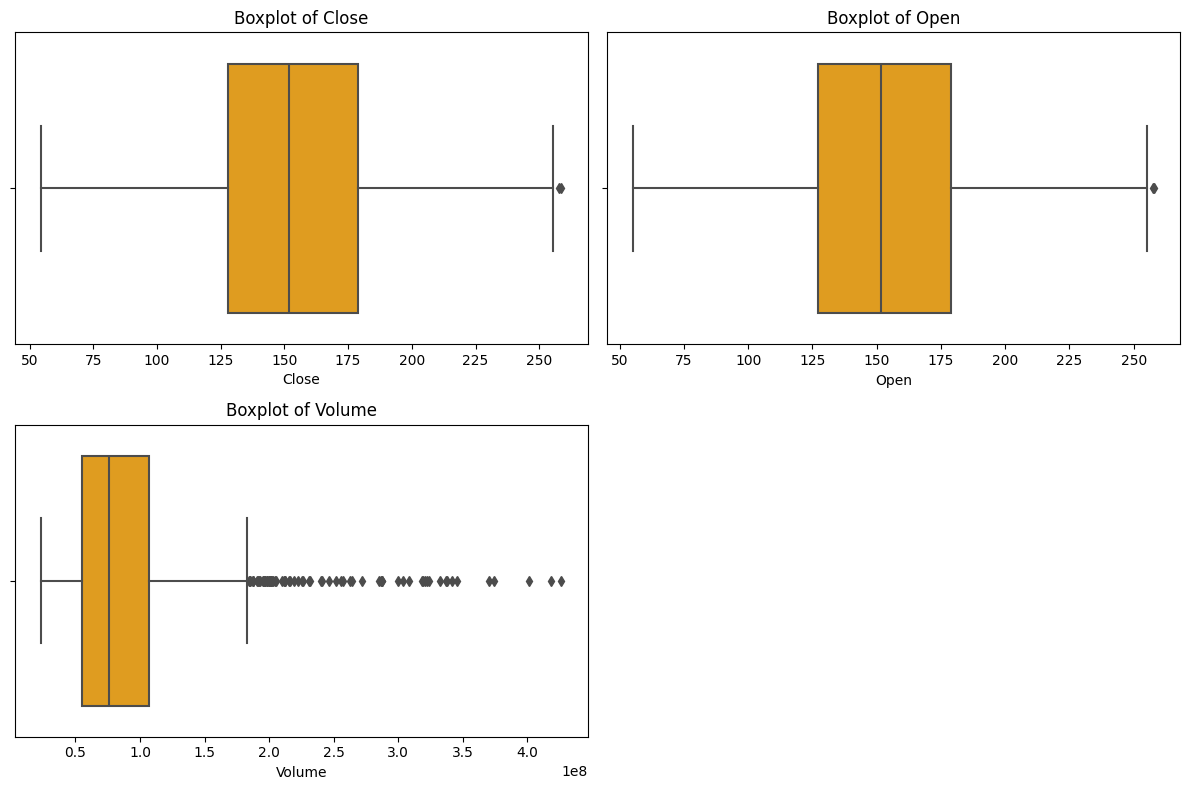

In [10]:
plt.figure(figsize=(12, 8))


for i, col in enumerate(data.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col], color="orange")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

.outliers are not errors but rare events.

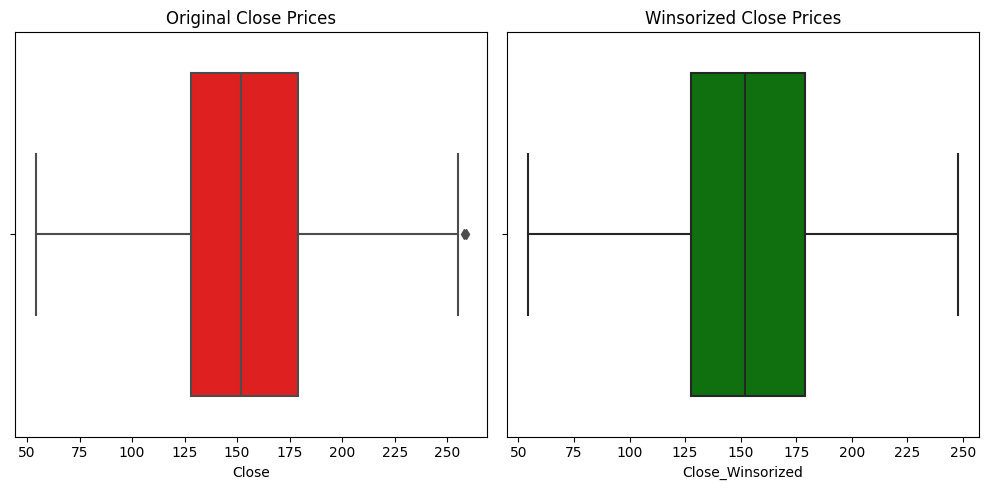

In [11]:
from scipy.stats.mstats import winsorize

# Apply Winsorization (limit extreme values at 0th and 99th percentile)
data["Close_Winsorized"] = winsorize(data["Close"], limits=[0, 0.01])

# Compare boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data["Close"], color="red")
plt.title("Original Close Prices")

plt.subplot(1, 2, 2)
sns.boxplot(x=data["Close_Winsorized"], color="green")
plt.title("Winsorized Close Prices")

plt.tight_layout()
plt.show()

In [12]:
# detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25
    Q3 = data[column].quantile(0.75)  # 75
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

for i, col in enumerate(data.columns, 1):
    outliers = detect_outliers_iqr(data, col)
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in Close: 2
Number of outliers in Open: 2
Number of outliers in Volume: 71
Number of outliers in Close_Winsorized: 0


/Users/purus15987/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/purus15987/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/purus15987/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/purus15987/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


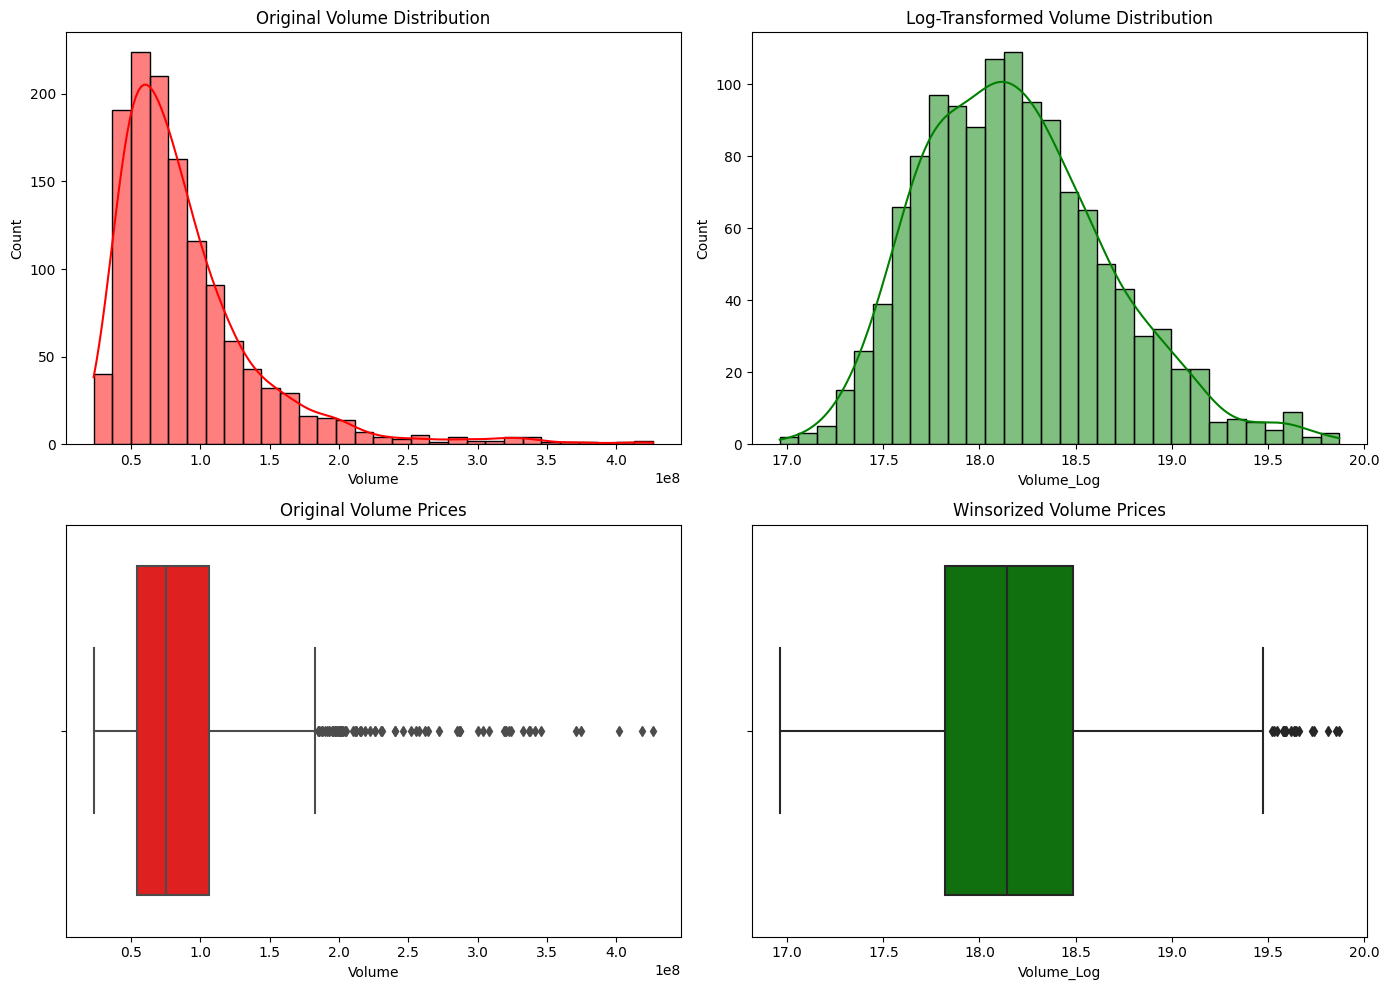

Number of outliers in Volume: 71
Number of outliers in Volume_Log: 18


/Users/purus15987/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/purus15987/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [13]:
import numpy as np

# Apply log transformation
data["Volume_Log"] = np.log(data["Volume"])


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of Original Volume
sns.histplot(data["Volume"], kde=True, bins=30, color="red", ax=axes[0, 0])
axes[0, 0].set_title("Original Volume Distribution")

# Histogram of Log-Transformed Volume
sns.histplot(data["Volume_Log"], kde=True, bins=30, color="green", ax=axes[0, 1])
axes[0, 1].set_title("Log-Transformed Volume Distribution")

# Boxplot of Original Close Prices
sns.boxplot(x=data["Volume"], color="red", ax=axes[1, 0])
axes[1, 0].set_title("Original Volume Prices")

# Boxplot of Winsorized Close Prices
sns.boxplot(x=data["Volume_Log"], color="green", ax=axes[1, 1])
axes[1, 1].set_title("Winsorized Volume Prices")

# Adjust layout
plt.tight_layout()
plt.show()

outliers = detect_outliers_iqr(data, 'Volume')
print(f"Number of outliers in Volume: {len(outliers)}")

outliers = detect_outliers_iqr(data, 'Volume_Log')
print(f"Number of outliers in Volume_Log: {len(outliers)}")

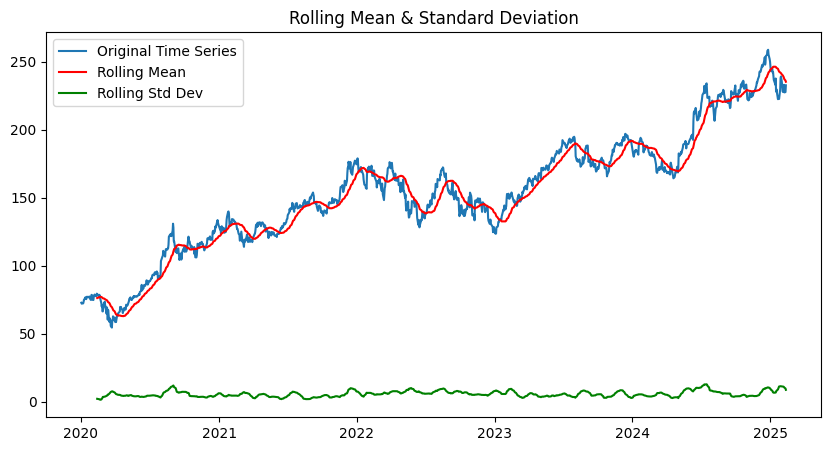

In [14]:
window_size = 30  # Adjust based on seasonality period
rolling_mean = data["Close"].rolling(window=window_size).mean()
rolling_std = data["Close"].rolling(window=window_size).std()

# Plot original data, rolling mean, and rolling std
plt.figure(figsize=(10, 5))
plt.plot(data["Close"], label="Original Time Series")
plt.plot(rolling_mean, label="Rolling Mean", color="red")
plt.plot(rolling_std, label="Rolling Std Dev", color="green")
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.show()

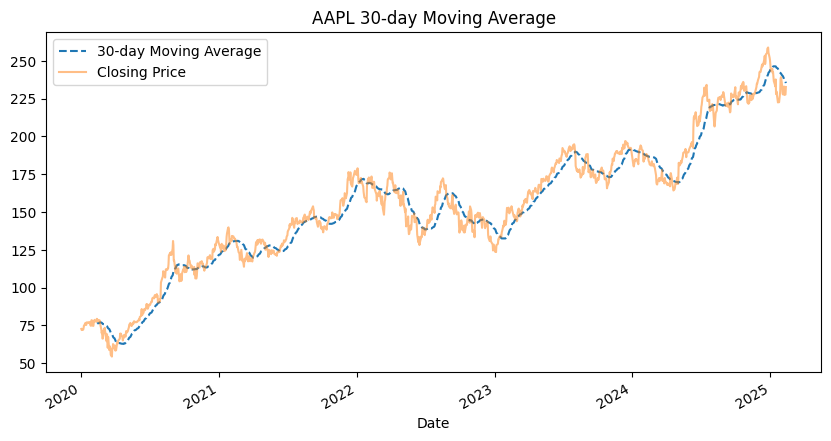

In [15]:
plt.figure(figsize=(10,5))
data["Close"].rolling(window=30).mean().plot(label="30-day Moving Average", linestyle="dashed")
data["Close"].plot(alpha=0.5, label="Closing Price")
plt.legend()
plt.title(f"{ticker} 30-day Moving Average")
plt.show()


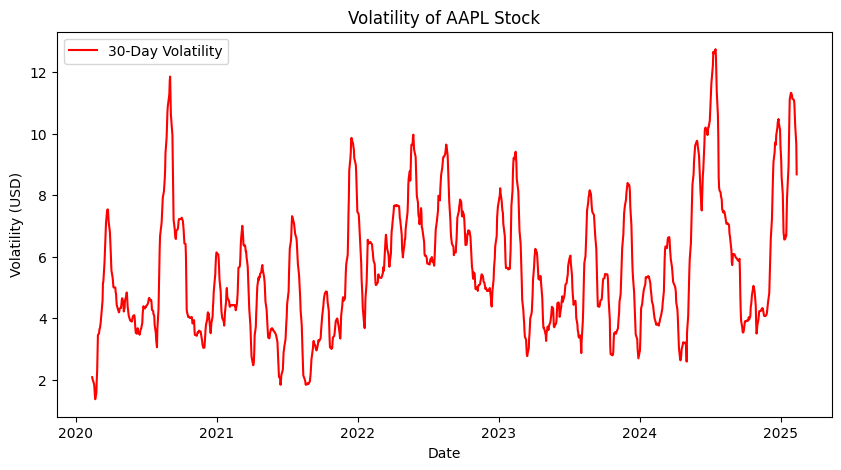

In [16]:
# Calculate 30-day rolling standard deviation (volatility)
data["30-day Volatility"] = data["Close"].rolling(window=30).std()

# Plot the volatility
plt.figure(figsize=(10,5))
plt.plot(data.index, data['30-day Volatility'], label="30-Day Volatility", color='red')
plt.title(f"Volatility of {ticker} Stock")
plt.xlabel("Date")
plt.ylabel("Volatility (USD)")
plt.legend()
plt.show()


In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the Close price
adf_test = adfuller(data["Close"].dropna())
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

if adf_test[1] < 0.05:
    print("Data is stationary (Reject null hypothesis)")
else:
    print("Data is non-stationary (Fail to reject null)")

ADF Statistic: -1.1713284328278037
p-value: 0.6858063244490415
Data is non-stationary (Fail to reject null)


In [18]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput[1] < 0.05:
        print("Data is stationary (Reject null hypothesis)")
    else:
        print("Data is non-stationary (Fail to reject null)")

#apply adf test on the series
adf_test(data['Close'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.171328
p-value                           0.685806
#Lags Used                        0.000000
Number of Observations Used    1284.000000
Critical Value (1%)              -3.435453
Critical Value (5%)              -2.863794
Critical Value (10%)             -2.567970
dtype: float64
Data is non-stationary (Fail to reject null)


# Make Data Stationary

In [19]:
data["diff"] = data["Close"].diff()
adf_test(data['diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -36.360160
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1283.000000
Critical Value (1%)              -3.435457
Critical Value (5%)              -2.863795
Critical Value (10%)             -2.567971
dtype: float64
Data is stationary (Reject null hypothesis)


In [20]:
data['diff'].head()

Date
2020-01-02         NaN
2020-01-03   -0.706932
2020-01-06    0.573761
2020-01-07   -0.341354
2020-01-08    1.162102
Name: diff, dtype: float64

In [21]:
data['diff'].isna().sum()

1

<Axes: xlabel='Date'>

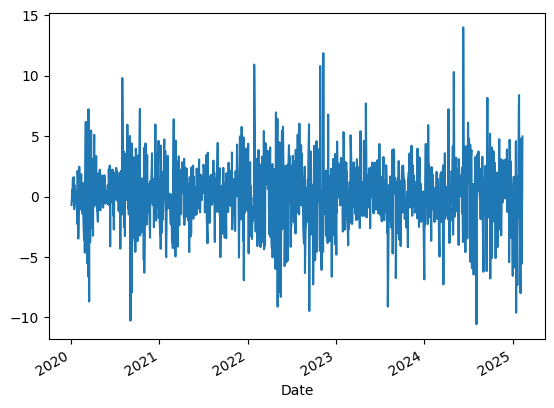

In [22]:
data['diff'].plot()

In [23]:
data["log_value"] = np.log(data["Close"])
adf_test(data['log_value'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -1.689510
p-value                           0.436525
#Lags Used                        9.000000
Number of Observations Used    1275.000000
Critical Value (1%)              -3.435489
Critical Value (5%)              -2.863810
Critical Value (10%)             -2.567978
dtype: float64
Data is non-stationary (Fail to reject null)


In [24]:
from scipy.stats import boxcox
data["boxcox_value"], lambda_param = boxcox(data["Close"])
adf_test(data['boxcox_value'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -1.189024
p-value                           0.678300
#Lags Used                        0.000000
Number of Observations Used    1284.000000
Critical Value (1%)              -3.435453
Critical Value (5%)              -2.863794
Critical Value (10%)             -2.567970
dtype: float64
Data is non-stationary (Fail to reject null)


In [25]:
data["detrended"] = data["Close"] - data["Close"].rolling(window=12).mean()
adf_test(data['detrended'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -8.715078e+00
p-value                        3.506132e-14
#Lags Used                     1.000000e+01
Number of Observations Used    1.263000e+03
Critical Value (1%)           -3.435538e+00
Critical Value (5%)           -2.863831e+00
Critical Value (10%)          -2.567990e+00
dtype: float64
Data is stationary (Reject null hypothesis)


<Axes: xlabel='Date'>

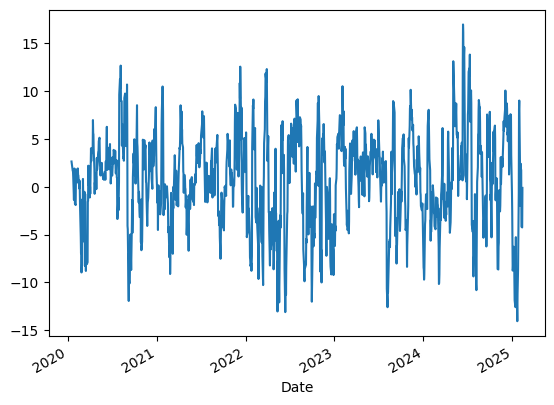

In [26]:
data['detrended'].plot()

In [27]:
data['detrended'].isna().sum()

11

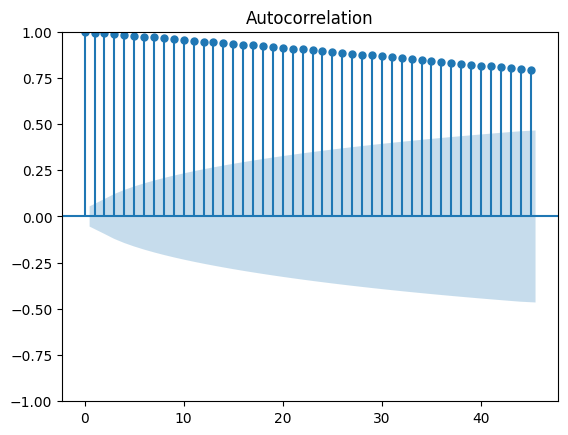

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot ACF to determine significant lags
plot_acf(data['Close'], lags=45, alpha =0.05)
plt.show()

In [29]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Prepare the dataset
data['Returns'] = data['Close'].pct_change().dropna()  # Use daily returns
data.dropna(inplace=True)

# Define independent (X) and dependent (Y) variables
X = np.arange(len(data)).reshape(-1, 1)  # Time as independent variable
Y = data['Returns'].values  # Returns as dependent variable

# Add constant for regression
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(Y, X).fit()

# Get residuals
residuals = model.resid

# Compute Durbin-Watson statistic
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

# Interpretation
if dw_stat < 1.5:
    print("Possible positive autocorrelation detected (momentum effect).")
elif 1.5 <= dw_stat <= 2.5:
    print("No significant autocorrelation (ideal case).")
else:
    print("Possible negative autocorrelation detected (mean-reverting pattern).")

Durbin-Watson Statistic: 2.2237
No significant autocorrelation (ideal case).


In [30]:
# Optional: Check stationarity using ADF test
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(residuals)
print(f"ADF Test Statistic: {adf_test[0]:.4f}, p-value: {adf_test[1]:.4f}")

ADF Test Statistic: -11.4616, p-value: 0.0000


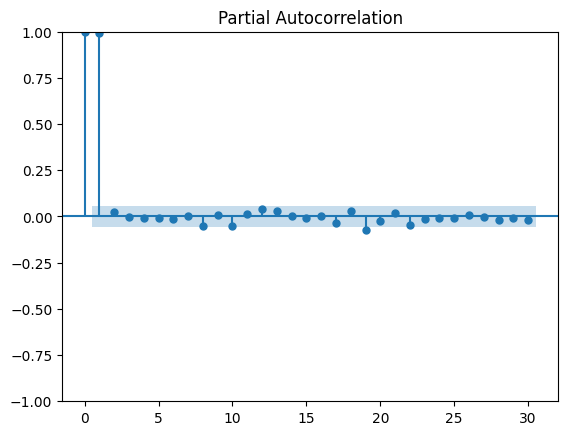

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot PACF to find the most relevant lag
plot_pacf(data['Close'], lags=30, alpha=0.05, method="ywm")
plt.show()

In [42]:
data['Close']

Date
2020-02-13     78.839119
2020-02-14     78.858543
2020-02-18     77.414604
2020-02-19     78.535782
2020-02-20     77.730080
                 ...    
2025-02-05    232.214691
2025-02-06    232.963867
2025-02-07    227.380005
2025-02-10    227.649994
2025-02-11    232.619995
Name: Close, Length: 1256, dtype: float64

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

def find_best_lag(data, max_lag=45):
    best_lag, best_aic = None, float("inf")
    
    for lag in range(1, min(max_lag, len(data) // 2)):  # Avoid lags that are too large
        try:
            model = AutoReg(data.reset_index(drop=True), lags=lag).fit()
            if model.aic < best_aic:
                best_aic, best_lag = model.aic, lag
#             print(f"Lag {lag}: AIC = {model.aic:.2f}")
        except Exception as e:
            print(f"Failed for lag {lag}: {e}")  # Catch errors without stopping execution

    print(f"\n Best Lag Found: {best_lag} (AIC: {best_aic:.2f})")
    return best_lag

# Find optimal lag
data['Close'] = data['Close'].asfreq('D').interpolate(method='linear') 
best_lag = find_best_lag(data['Close'].dropna(), max_lag=45)


 Best Lag Found: 44 (AIC: 5912.79)


AutoReg(5) - Test MAE: 35.9830


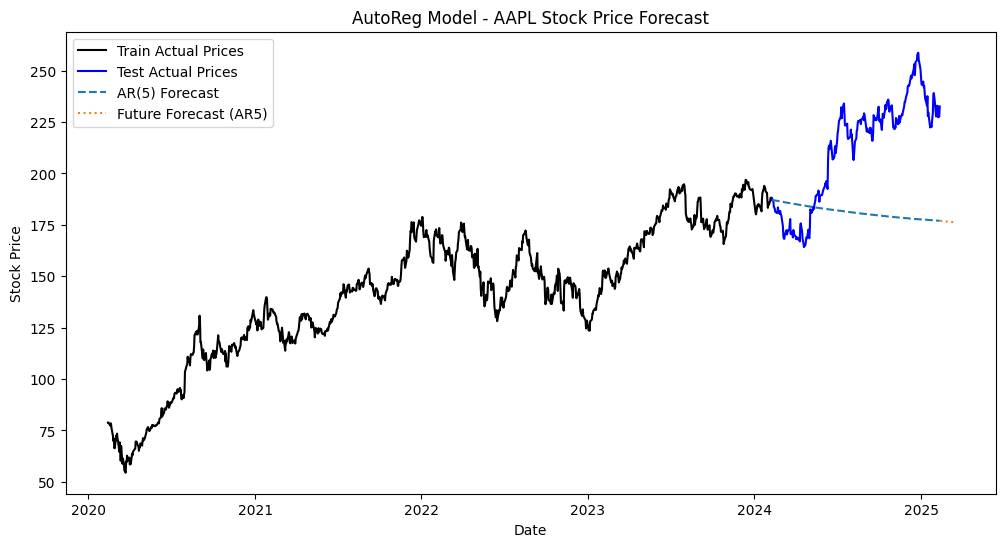

AutoReg(15) - Test MAE: 37.4157


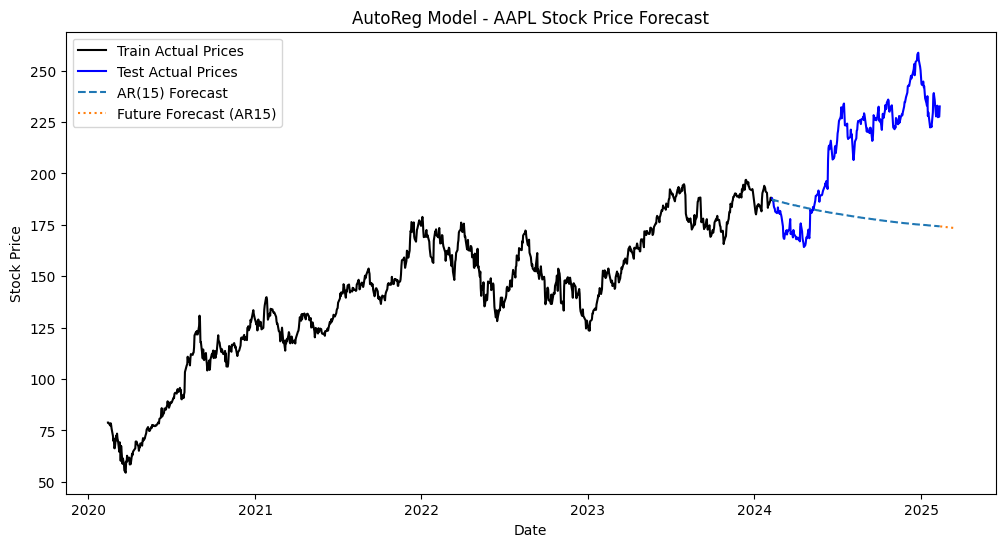

AutoReg(30) - Test MAE: 39.4615


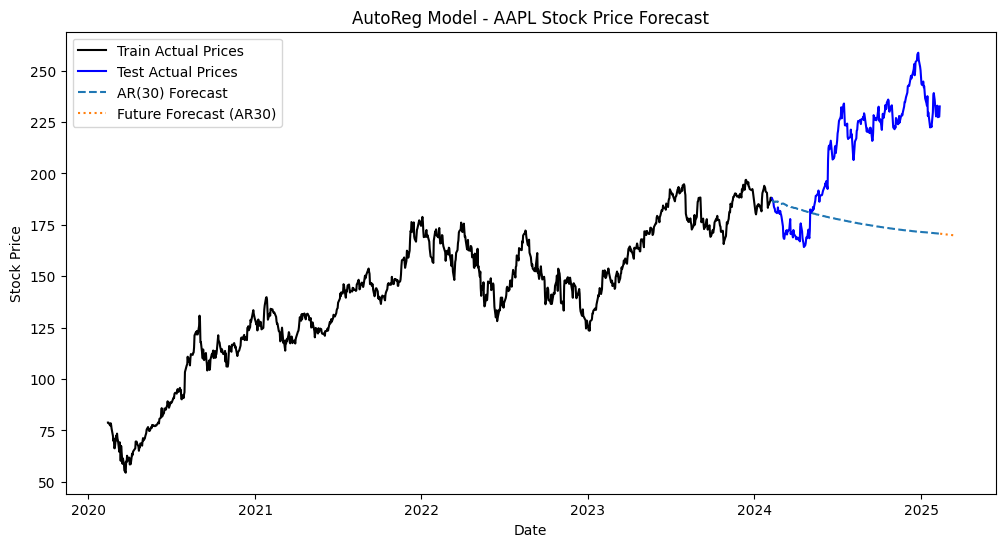

AutoReg(350) - Test MAE: 65.3000


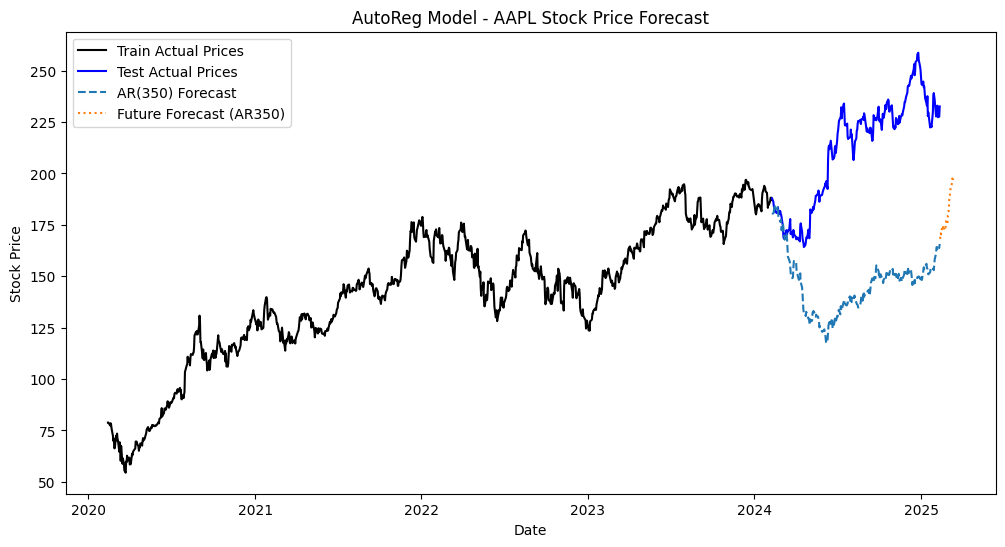

In [52]:
def auto_reg_forecast(data, lag, test_size=0.2, n_future=30):
    # Train-Test Split
    train_size = int(len(data) * (1 - test_size))
    train, test = data[:train_size], data[train_size:]

    # Fit AutoReg Model
    model = AutoReg(train.reset_index(drop=True), lags=lag).fit()

    # Forecast on test set & future days
    start, end = len(train), len(train) + len(test) - 1
    test_forecast = model.predict(start=start, end=end)
    future_forecast = model.predict(start=end + 1, end=end + n_future)

    # Evaluate Model
    mae = mean_absolute_error(test, test_forecast)
    print(f"AutoReg({lag}) - Test MAE: {mae:.4f}")

    # Plot Results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label="Train Actual Prices", color="black")
    plt.plot(test.index, test, label="Test Actual Prices", color="blue")
    plt.plot(test.index, test_forecast, label=f"AR({lag}) Forecast", linestyle="dashed")
    future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=n_future, freq="D")
    plt.plot(future_dates, future_forecast, label=f"Future Forecast (AR{lag})", linestyle="dotted")
    
    plt.title("AutoReg Model - AAPL Stock Price Forecast")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

# Run AutoReg with optimized lag
for lag in [5,15,30,350]:
    auto_reg_forecast(data['Close'], lag, n_future=30)

/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1004
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -4278.244
Date:                Fri, 14 Feb 2025   AIC                           8562.487
Time:                        00:01:27   BIC                           8577.223
Sample:                             0   HQIC                          8568.087
                               - 1004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.6520      1.176    120.503      0.000     139.348     143.956
ma.L1          0.9542      0.012     80.943      0.000       0.931       0.977
sigma2       293.5703     15.082     19.464      0.0

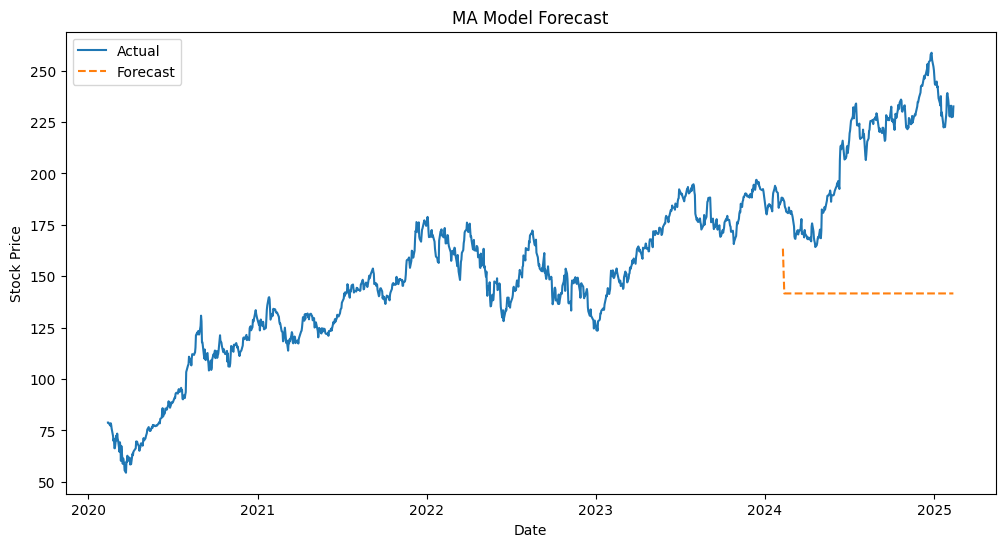

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Assuming 'data' is your time series
train_size = int(len(data['Close']) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]

# Fit the MA model (for example, MA(1))
q = 1  # You can try different lags based on ACF
model = ARIMA(train, order=(0, 0, q))  # ARIMA with AR=0, differencing=0, MA=q
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())

# Make predictions
forecast = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate the model
mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(data.index[train_size:], forecast, label='Forecast', linestyle='--')
plt.title('MA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [60]:
from statsmodels.tsa.arima.model import ARIMA

# Function to perform model order selection using AIC and BIC
def select_best_arima_order(data, p_range, d_range, q_range):
    best_aic = np.inf
    best_bic = np.inf
    best_order_aic = None
    best_order_bic = None
    results = []

    # Iterate through all combinations of p, d, q
    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    # Fit the ARIMA model
                    model = ARIMA(data.reset_index(drop=True), order=(p, d, q))
                    model_fit = model.fit()

                    # Extract AIC and BIC
                    aic = model_fit.aic
                    bic = model_fit.bic

                    # Track the best AIC and BIC values
                    if aic < best_aic:
                        best_aic = aic
                        best_order_aic = (p, d, q)
                    
                    if bic < best_bic:
                        best_bic = bic
                        best_order_bic = (p, d, q)

                    # Store results for comparison
                    results.append((p, d, q, aic, bic))

                except Exception as e:
                    # If fitting the model fails (due to non-stationarity, etc.), continue
                    print(f"Model ARIMA({p}, {d}, {q}) failed: {e}")
                    continue

    # Convert results to a DataFrame for easy comparison
    results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC', 'BIC'])

    return results_df, best_order_aic, best_order_bic

# Define the ranges for p, d, q (you can adjust these based on your dataset)
p_range = range(0, 4)  # p values to try (0 to 3)
d_range = range(0, 2)  # d values to try (0 to 1)
q_range = range(0, 4)  # q values to try (0 to 3)

# Perform model order selection
results_df, best_order_aic, best_order_bic = select_best_arima_order(data['Close'], p_range, d_range, q_range)

# Print the results
print(f"Best ARIMA order based on AIC: {best_order_aic}")
print(f"Best ARIMA order based on BIC: {best_order_bic}")
print("Full results of AIC and BIC for different ARIMA combinations:")
print(results_df)


/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible start

Best ARIMA order based on AIC: (0, 1, 0)
Best ARIMA order based on BIC: (0, 1, 0)
Full results of AIC and BIC for different ARIMA combinations:
    p  d  q           AIC           BIC
0   0  0  0  12960.294235  12970.565610
1   0  0  1  11328.353172  11343.760234
2   0  0  2  10068.654138  10089.196888
3   0  0  3   9186.252003   9211.930439
4   0  1  0   6092.801250   6097.936140
5   0  1  1   6094.521386   6104.791168
6   0  1  2   6096.325569   6111.730241
7   0  1  3   6097.318668   6117.858232
8   1  0  0   6107.482189   6122.889251
9   1  0  1   6109.230091   6129.772840
10  1  0  2   6111.057667   6136.736104
11  1  0  3   6112.100924   6142.915048
12  1  1  0   6094.528262   6104.798044
13  1  1  1   6096.135688   6111.540361
14  1  1  2   6098.041031   6118.580594
15  1  1  3   6099.243021   6124.917475
16  2  0  0   6109.235918   6129.778667
17  2  0  1   6110.897069   6136.575505
18  2  0  2   6113.219796   6144.033920
19  2  0  3   6114.018468   6149.968280
20  2  1  0   60

In [54]:
from statsmodels.tsa.arima.model import ARIMA


# Step 1: Split data into train and test
train_size = int(len(data['Close']) * 0.8)  # 80% for training, 20% for testing
train, test = data['Close'][:train_size], data['Close'][train_size:]

model = ARIMA(train, order=best_order_aic)  # 1st order differencing
fitted_model = model.fit()

print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1004
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2392.730
Date:                Thu, 13 Feb 2025   AIC                           4787.460
Time:                        22:57:24   BIC                           4792.371
Sample:                             0   HQIC                          4789.326
                               - 1004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.9120      0.230     29.995      0.000       6.460       7.364
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):               108.35
Prob(Q):                              0.29   Pr

/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1600x1200 with 0 Axes>

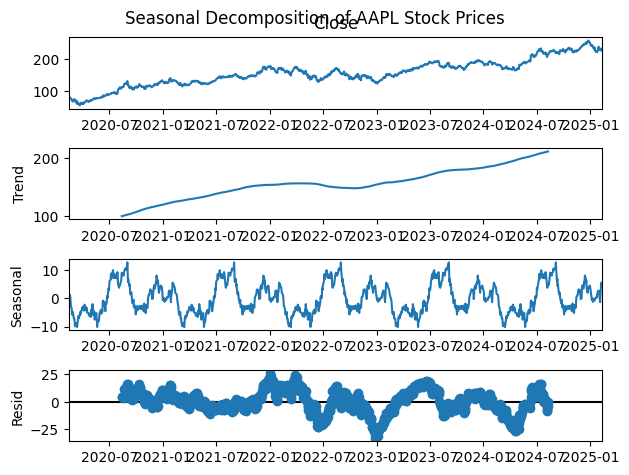

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure data has a DatetimeIndex
data['Close'].interpolate(method='linear', inplace=True)
data.index = pd.to_datetime(data.index)  # Ensure index is datetime

period = 252

# Perform seasonal decomposition
result = seasonal_decompose(data['Close'], model='additive', period=period)

# Plot the decomposition
plt.figure(figsize=(16, 12))
result.plot()
plt.suptitle('Seasonal Decomposition of AAPL Stock Prices')
plt.show()


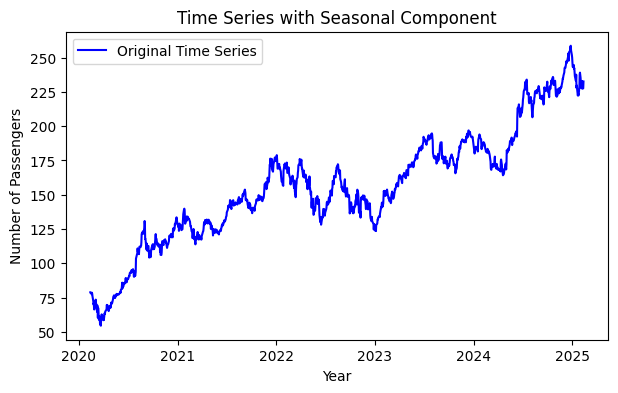

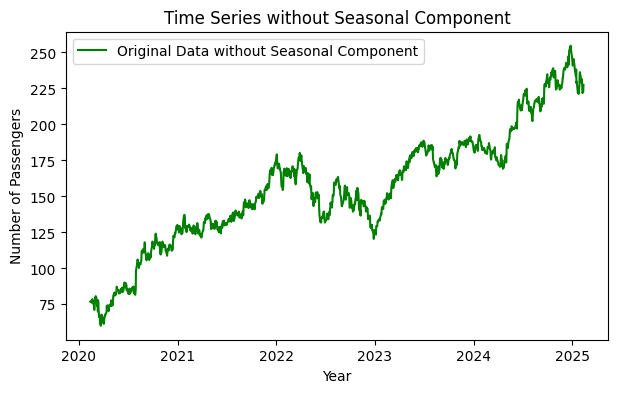

In [67]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))
# Plot the original time series data
plt.plot(data['Close'], label='Original Time Series', color='blue')
data_without_seasonal = data['Close'] - result.seasonal
plt.title('Time Series with Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
# Plot the original data without the seasonal component
plt.plot(data_without_seasonal, label='Original Data without Seasonal Component', color='green')
plt.title('Time Series without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1004
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2392.034
Date:                Thu, 13 Feb 2025   AIC                           4790.068
Time:                        22:57:28   BIC                           4804.800
Sample:                             0   HQIC                          4795.666
                               - 1004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4498      0.592      0.760      0.447      -0.710       1.610
ma.L1         -0.4831      0.584     -0.827      0.408      -1.627       0.661
sigma2         6.9028      0.236     29.203      0.0

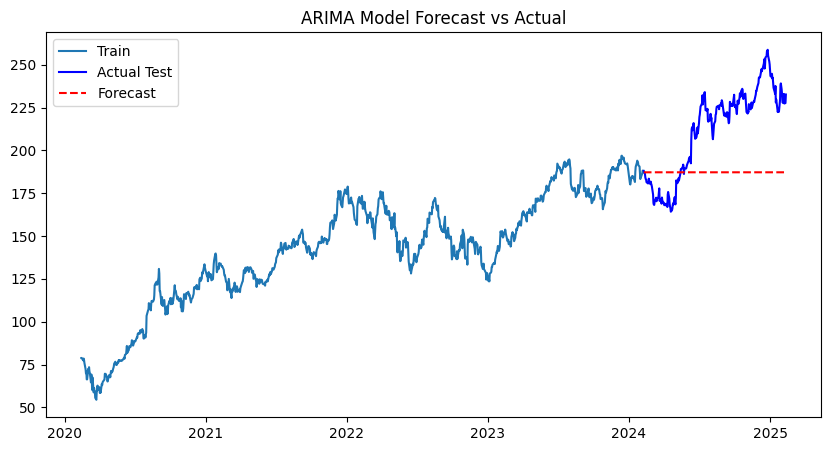

In [55]:
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Split data into train and test
train_size = int(len(data['Close']) * 0.8)  # 80% training, 20% testing
train, test = data['Close'][:train_size], data['Close'][train_size:]

# Step 2: Fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # (p=1, d=1, q=0)
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

# Step 3: Forecast
start = len(train)
end = len(train) + len(test) - 1
forecast = fitted_model.predict(start=start, end=end, typ="levels")  # Use "levels" to get actual values

print(forecast)

# Step 4: Evaluate Performance
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, forecast)
print(f"Mean Absolute Error: {mae}")

# Step 5: Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual Test", color="blue")
plt.plot(test.index, forecast, label="Forecast", color="red", linestyle="dashed")
plt.legend()
plt.title("ARIMA Model Forecast vs Actual")
plt.show()


/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1256
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3005.572
Date:                            Fri, 14 Feb 2025   AIC                           6021.144
Time:                                    00:13:50   BIC                           6046.714
Sample:                                         0   HQIC                          6030.764
                                           - 1256                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5269      2.249     -0.234      0.815      -4.935       3.881
ma.L1          0.5230      2.254   

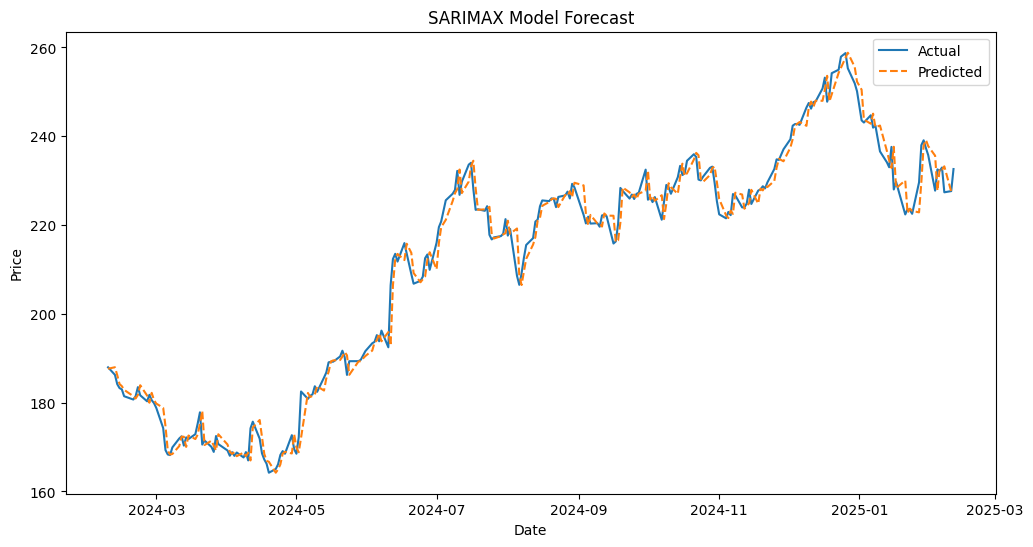

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Define seasonal periods, typically 12 for monthly data or 4 for quarterly
seasonal_period = 12

# Define the SARIMAX model (p, d, q) for ARIMA and (P, D, Q, S) for seasonal components
model = SARIMAX(data['Close'], 
                order=(1, 1, 1),   # ARIMA part (p=1, d=1, q=1)
                seasonal_order=(1, 1, 1, seasonal_period),  # Seasonal part (P=1, D=1, Q=1, S=12)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
fitted_model = model.fit(disp=False)

# Print the summary of the SARIMAX model
print(fitted_model.summary())

# Make predictions
train_size = int(len(data) * 0.8)
train, test = data['Close'][:train_size], data['Close'][train_size:]
forecast = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print(f'Mean Absolute Error: {mae}')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size:], test, label='Actual')
plt.plot(data.index[train_size:], forecast, label='Predicted', linestyle='--')
plt.title('SARIMAX Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/Users/purus15987/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


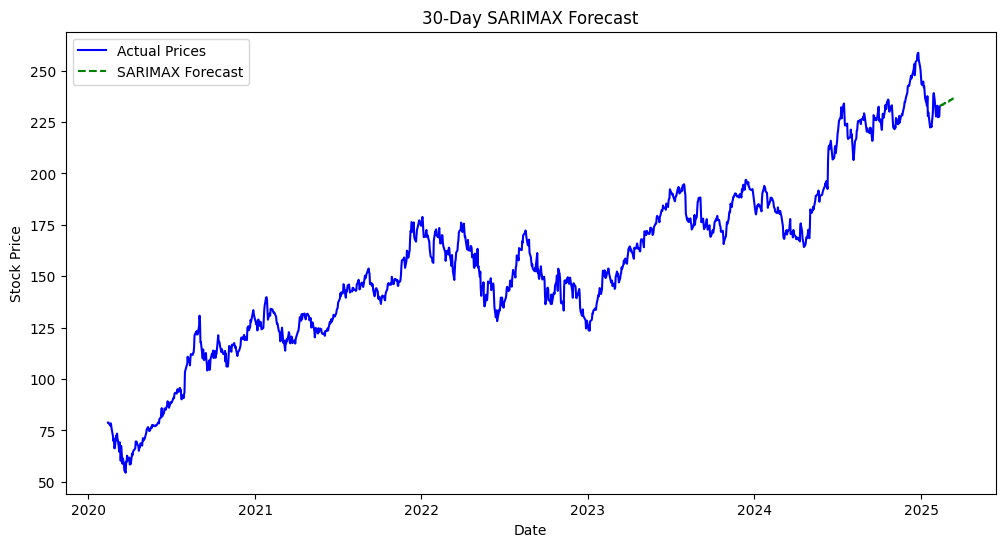

           Date  Predicted_Close
1256 2025-02-12       233.001155
1257 2025-02-13       233.150212
1258 2025-02-14       233.096241
1259 2025-02-15       233.137309
1260 2025-02-16       233.559068
1261 2025-02-17       233.365944
1262 2025-02-18       233.363075
1263 2025-02-19       233.620365
1264 2025-02-20       233.899993
1265 2025-02-21       234.125001
1266 2025-02-22       234.269019
1267 2025-02-23       234.077100
1268 2025-02-24       234.473065
1269 2025-02-25       234.619214
1270 2025-02-26       234.569060
1271 2025-02-27       234.607618
1272 2025-02-28       235.029468
1273 2025-03-01       234.832617
1274 2025-03-02       234.831995
1275 2025-03-03       235.088906
1276 2025-03-04       235.368801
1277 2025-03-05       235.591355
1278 2025-03-06       235.735445
1279 2025-03-07       235.545662
1280 2025-03-08       235.941627
1281 2025-03-09       236.087775
1282 2025-03-10       236.037621
1283 2025-03-11       236.076178
1284 2025-03-12       236.498029
1285 2025-

In [70]:
# Forecast the next 30 days
future_steps = 30
future_forecast = fitted_model.predict(start=len(data), end=len(data) + future_steps - 1)

# Generate future dates
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]

# Plot the actual data and future forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')
plt.plot(future_dates, future_forecast, label='SARIMAX Forecast', color='green', linestyle='dashed')
plt.title('30-Day SARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print Forecasted Values
future_forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_forecast})
print(future_forecast_df)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Scale data between 0 and 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])

# Convert to time-series format (Lags = 50 days)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 50  # Use past 50 days to predict next day
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split into train-test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM (samples, time steps, features)
X_train = X_train.reshape(-1, SEQ_LENGTH, 1)
X_test = X_test.reshape(-1, SEQ_LENGTH, 1)

# LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    LSTM(50, return_sequences=False),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse scale back to original prices
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE
mae_lstm = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"LSTM Model MAE: {mae_lstm:.2f}")

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label="Actual Prices", color="black")
plt.plot(data.index[-len(y_pred_actual):], y_pred_actual, label="LSTM Predictions", linestyle="dashed", color="red")
plt.legend()
plt.title("LSTM Model - AAPL Stock Price Prediction")
plt.show()
